# Import Dataset, Split X,Y

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
trainDF = pd.read_csv('E:/Sem5/ML-Final-Project/Dataset/train.csv', low_memory=False)
valDF = pd.read_csv('E:/Sem5/ML-Final-Project/Dataset/val.csv', low_memory=False)
testDF = pd.read_csv('E:/Sem5/ML-Final-Project/Dataset/test.csv', low_memory=False)

In [3]:
train_X = trainDF.drop(columns=['data_IMDBscore'])
train_Y = trainDF['data_IMDBscore']

In [4]:
val_X = valDF.drop(columns=['data_IMDBscore'])
val_Y = valDF['data_IMDBscore']

In [5]:
test_X = testDF.drop(columns=['data_IMDBscore'])
test_Y = testDF['data_IMDBscore']

# Train Model

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Grid Search

In [7]:
list_of_alphas=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
gridSearch = GridSearchCV(estimator=Ridge(fit_intercept=True, copy_X=True, random_state=0), param_grid={'alpha':list_of_alphas}, n_jobs=-1)

In [8]:
gridSearch.fit(val_X,val_Y)

GridSearchCV(estimator=Ridge(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90, 100, 110, 120, 130, 140,
                                   150]})

In [9]:
print(gridSearch.best_estimator_.alpha)

60


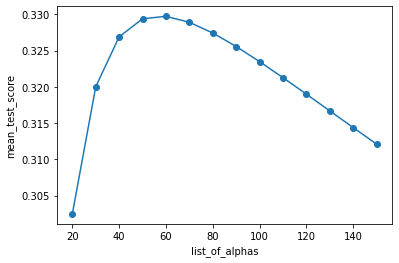

In [14]:
plt.scatter(list_of_alphas[6:],gridSearch.cv_results_['mean_test_score'][6:])
plt.plot(list_of_alphas[6:],gridSearch.cv_results_['mean_test_score'][6:])
plt.xlabel('list_of_alphas')
plt.ylabel('mean_test_score')
plt.savefig('Graphs/ridge_gs_fig1.png')
plt.show()

### Refined Grid Search

In [15]:
refined_list_of_alphas = [55,56,57,58,59,60,61,62,63,64,65]
refinedGridSearch = GridSearchCV(estimator=Ridge(fit_intercept=True, copy_X=True, random_state=0), param_grid={'alpha':refined_list_of_alphas}, n_jobs=-1)

In [16]:
refinedGridSearch.fit(val_X,val_Y)

GridSearchCV(estimator=Ridge(random_state=0), n_jobs=-1,
             param_grid={'alpha': [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]})

In [17]:
print(refinedGridSearch.best_estimator_.alpha)

57


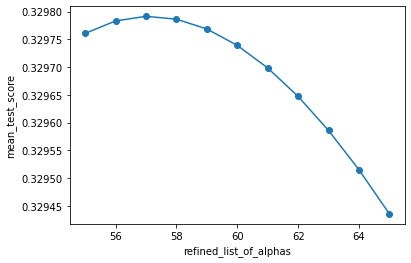

In [18]:
plt.scatter(refined_list_of_alphas,refinedGridSearch.cv_results_['mean_test_score'])
plt.plot(refined_list_of_alphas,refinedGridSearch.cv_results_['mean_test_score'])
plt.xlabel('refined_list_of_alphas')
plt.ylabel('mean_test_score')
plt.savefig('Graphs/ridge_gs_fig2.png')
plt.show()

### Best Model Training and Testing

In [19]:
ridge_model = Ridge(alpha=57.0, fit_intercept=True, copy_X=True, random_state=0)

In [20]:
ridge_model.fit(train_X, train_Y)

Ridge(alpha=57.0, random_state=0)

In [21]:
print('Train R^2: ', ridge_model.score(train_X, train_Y))
print('Train MSE: ', mean_squared_error(ridge_model.predict(train_X), train_Y))

print('Val R^2: ', ridge_model.score(val_X, val_Y))
print('Val MSE: ', mean_squared_error(ridge_model.predict(val_X), val_Y))

print('Test R^2: ', ridge_model.score(test_X, test_Y))
print('Test MSE: ', mean_squared_error(ridge_model.predict(test_X), test_Y))

Train R^2:  0.5175435563834769
Train MSE:  0.5747589707013727
Val R^2:  0.4163078397620773
Val MSE:  0.7176384956183749
Test R^2:  0.42357750763886204
Test MSE:  0.6822937025871498


# Saving Model

In [22]:
# filename = 'Linear_Regression_Ridge.sav'
# pickle.dump(ridge_model, open(filename, 'wb'))